# OSM 2018 Computation
## Problem Set 6
### 07.30.2018 
### Yung-Hsu Tsui*
* I thank Jay-Hyung Kim for the precious comments.

### Numerical Differentiation
#### Problem 14.1

In [2]:
import sympy as sy
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def function(domain):
    x = sy.symbols('x')
    func = lambda domain: (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    f = sy.lambdify(x, func(x))
    return f(domain)

def derivative(domain):
    x = sy.symbols('x')
    func_prime = lambda domain: sy.diff((sy.sin(x) + 1) ** sy.sin(sy.cos(x)), x)
    f_prime = sy.lambdify(x, func_prime(x))
    return f_prime(domain)

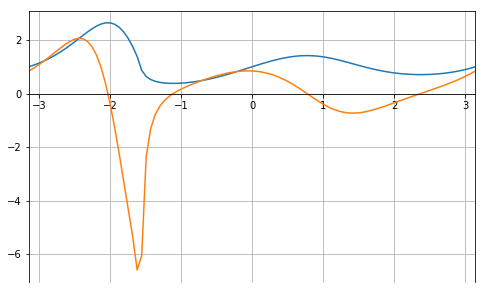

In [4]:
x = np.linspace(-np.pi, np.pi, 100)
f = function(x)
f_prime = derivative(x)
fig, ax = plt.subplots(figsize=(8,5))
ax.spines["bottom"].set_position("zero")
ax.plot(x, f)
ax.plot(x, f_prime)
ax.set_xlim(-np.pi, np.pi)
ax.grid(True)
plt.show()

#### Problem 14.2

In [6]:
# Forward
forward_ord_1 = lambda f, x, h: (f(x + h) - f(x)) / h
forward_ord_2 = lambda f, x, h: (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
forward_1_1 = forward_ord_1(function, x, 1e-1)
forward_2_1 = forward_ord_2(function, x, 1e-1)
forward_1_2 = forward_ord_1(function, x, 1e-6)
forward_2_2 = forward_ord_2(function, x, 1e-6)

#Backward
backward_ord_1 = lambda f, x, h: (f(x) - f(x - h)) / h
backward_ord_2 = lambda f, x, h: (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)
backward_1_1 = backward_ord_1(function, x, 1e-1)
backward_2_1 = backward_ord_2(function, x, 1e-1)
backward_1_2 = backward_ord_1(function, x, 1e-6)
backward_2_2 = backward_ord_2(function, x, 1e-6)

#Center
centered_ord_2 = lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h)
centered_ord_4 = lambda f, x, h: (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
centered_2_1 = centered_ord_2(function, x, 1e-1)
centered_4_1 = centered_ord_4(function, x, 1e-1)
centered_2_2 = centered_ord_2(function, x, 1e-6)
centered_4_2 = centered_ord_4(function, x, 1e-6)

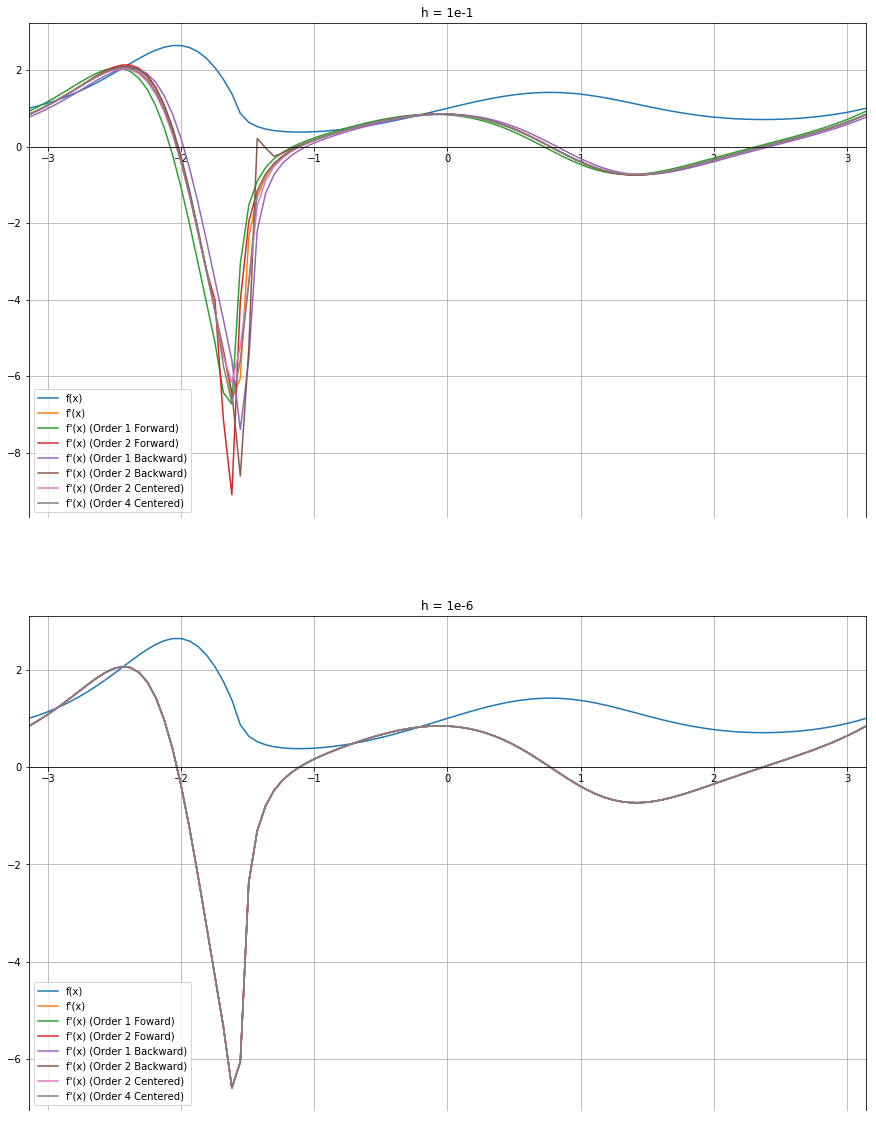

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
axes[0].spines["bottom"].set_position("zero")
axes[0].plot(x, f, label="f(x)")
axes[0].plot(x, f_prime, label="f'(x)")
axes[0].plot(x, forward_1_1, label="f'(x) (Order 1 Forward)")
axes[0].plot(x, forward_2_1, label="f'(x) (Order 2 Forward)")
axes[0].plot(x, backward_1_1, label="f'(x) (Order 1 Backward)")
axes[0].plot(x, backward_2_1, label="f'(x) (Order 2 Backward)")
axes[0].plot(x, centered_2_1, label="f'(x) (Order 2 Centered)")
axes[0].plot(x, centered_4_1, label="f'(x) (Order 4 Centered)")
axes[0].set_title("h = 1e-1")
axes[0].set_xlim(-np.pi, np.pi)
axes[0].grid(True)
axes[0].legend()

axes[1].spines["bottom"].set_position("zero")
axes[1].plot(x, f, label="f(x)")
axes[1].plot(x, f_prime, label="f'(x)")
axes[1].plot(x, forward_1_2, label="f'(x) (Order 1 Foward)")
axes[1].plot(x, forward_2_2, label="f'(x) (Order 2 Foward)")
axes[1].plot(x, backward_1_2, label="f'(x) (Order 1 Backward)")
axes[1].plot(x, backward_2_2, label="f'(x) (Order 2 Backward)")
axes[1].plot(x, centered_2_2, label="f'(x) (Order 2 Centered)")
axes[1].plot(x, centered_4_2, label="f'(x) (Order 4 Centered)")
axes[1].set_title("h = 1e-6")
axes[1].set_xlim(-np.pi, np.pi)
axes[1].grid(True)
axes[1].legend()
plt.show()

#### Problem 14.3

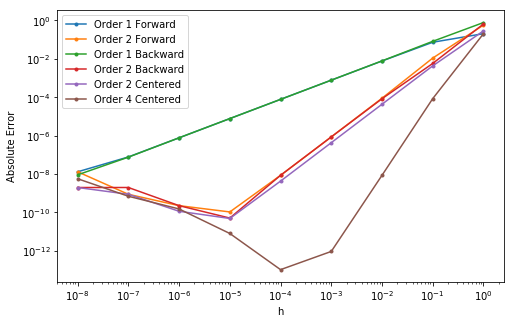

In [8]:
def error(x):
    d = derivative(x)
    h_list = np.logspace(-8, 0, 9)
    approx = np.empty((len(h_list), 6))
    for i, h in enumerate(h_list):
        approx[i, 0] = forward_ord_1(function, x, h)
        approx[i, 1] = forward_ord_2(function, x, h)
        approx[i, 2] = backward_ord_1(function, x, h)
        approx[i, 3] = backward_ord_2(function, x, h)
        approx[i, 4] = centered_ord_2(function, x, h)
        approx[i, 5] = centered_ord_4(function, x, h)
    
    plt.figure(figsize=(8, 5))
    labels = ["Order 1 Forward", "Order 2 Forward", "Order 1 Backward", "Order 2 Backward", 
             "Order 2 Centered", "Order 4 Centered"]
    for i in range(6):
        plt.loglog(h_list, np.abs(d - approx[:, i]), linestyle='-', marker='.', label=labels[i])
    plt.legend()
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.show()

error(1)

#### Problem 14.4

In [9]:
plane = np.load("plane.npy")
α = np.deg2rad(plane[:, 1])
β = np.deg2rad(plane[:, 2])
x = 500 * np.tan(β) / (np.tan(β) - np.tan(α))
y = 500 * (np.tan(β) * np.tan(α)) / (np.tan(β) - np.tan(α))

In [10]:
x_prime, y_prime = np.empty_like(x), np.empty_like(y)
x_prime[0] = (-3 * x[0] + 4 * x[1] - x[2]) / 2
y_prime[0] = (-3 * y[0] + 4 * y[1] - y[2]) / 2
x_prime[7] = (3 * x[7] - 4 * x[6] + x[5]) / 2
y_prime[7] = (3 * y[7] - 4 * y[6] + y[5]) / 2
for i in range(1, 7):
    x_prime[i] = (x[i+1] - x[i-1]) / 2
    
speed = np.sqrt(x_prime ** 2 + y_prime ** 2)
print(α)

[0.9817477  0.96918133 0.95644043 0.94352499 0.93095862 0.91961398
 0.90652401 0.89500484]


#### Problem 14.5

In [11]:
def jacobian(f, x, h):
    n = len(x)
    m = len(f(x))
    jacobian = np.empty((n, m))
    for j in range(n):
        e = np.identity(n)[j]
        jacobian[:, j] = (f(x + h * e) - f(x - h * e)) / (2 * h)
    return jacobian

f = lambda X: np.array([X[0] ** 2, X[0] ** 3 - X[1]]).T
X = np.array([1, 2])
jacobian(f, X, 1e-3)

array([[ 2.      ,  0.      ],
       [ 3.000001, -1.      ]])

#### Problem 14.6

In [53]:
from autograd import numpy as anp
from autograd import elementwise_grad

def T(x, n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2 * x * T(x, n - 1) - T(x, n - 2)
    
def T_prime(x, n):
    t_prime = elementwise_grad(T(x, n), 0)
    return t_prime(x, n)

In [ ]:
x = anp.linspace(-1, 1, 100)
n_list = np.arange(0, 5)
chebyshev = np.empty((5, len(x)))
for i, n in enumerate(n_list):
    chebyshev[i] = T_prime(x, n)
    plt.plot(x, chebyshev[i], label=f"n = {n}")
plt.legend()
plt.ylim([-10, 10])
plt.show()

#### Problem 14.7

In [56]:
import time
from autograd import grad

def time_vs_error(N):
    errors = np.zeros((3, N))
    errors[0] = np.full(N, 1e-18)
    times = np.zeros((3, N))
    
    for n in range(N):
        
        x = np.random.random()
        start_1 = time.time()
        d = derivative(x)
        end_1 = time.time()
        times[0, n] = end_1 - start_1
    
        f = lambda x: (anp.sin(x) + 1) ** anp.sin(anp.cos(x))
        start_2 = time.time()
        errors[1, n] = d - centered_ord_4(f, x, 1e-5)
        end_2 = time.time()
        times[1, n] = end_2 - start_2
        
        start_3 = time.time()
        errors[2, n] = d - grad(f)(x)
        end_3 = time.time()
        times[2, n] = end_3 - start_3
        
    labels = ['SymPy', 'Difference Quotients', 'Autograd']
    for i in range(3):
        plt.scatter(times[i], errors[i], alpha=0.5, label=labels[i])
    
    plt.xlim([1e-5, 1e-1])
    plt.ylim([1e-19, 1e-10])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.legend()
    plt.show()

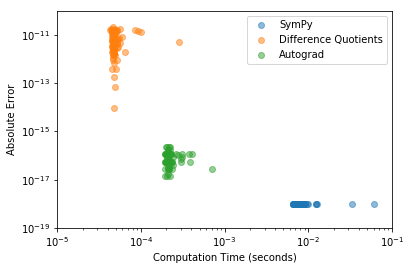

In [57]:
time_vs_error(200)

### Differentiation
#### Problem 1

In [58]:
import sympy as sy
import numpy as np
x =sy.symbols('x')
f = (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
df = sy.diff(f,x)
f1 = sy.lambdify(x,f)
df1 = sy.lambdify(x,df)
x_def = np.linspace(-np.pi,np.pi,10000)

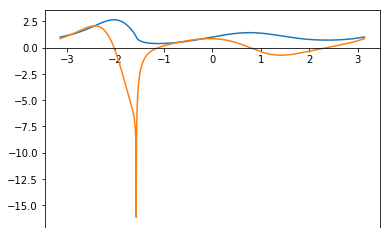

In [59]:
from matplotlib import pyplot as plt

ax = plt.gca()
plt.plot(x_def,f1(x_def))
plt.plot(x_def,df1(x_def))
ax.spines["bottom"].set_position("zero")

#### Problem 2

In [61]:
def df_Forward(x0,f,h=1e-7):
    
    df = (f(x0+h)-f(x0))/h
    dfsq = (-3*f(x0) + 4*(f(x0+h)) -f(x0 + 2*h))/(2*h)
    
    return df,dfsq

def df_Backward(x0,f,h=1e-7):
    
    df = (f(x0)-f(x0-h))/h
    dfsq = (3*f(x0) - 4*(f(x0-h)) +f(x0 - 2*h))/(2*h)
    
    return df,dfsq

def df_Central(x0,f,h=1e-7):
    
    df = (f(x0+h)-f(x0-h))/(2*h)
    dfsq = (f(x0-2*h) -8*f(x0-h) + 8*f(x0+h) -f(x0+2*h))/(12*h)
    
    return df,dfsq

array([-3.14159265, -3.14096427, -3.14033589, ...,  3.14033589,
        3.14096427,  3.14159265])

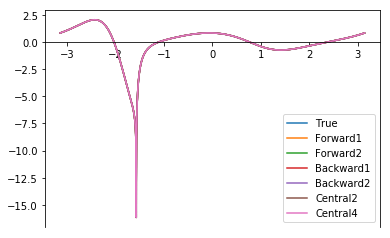

In [62]:
dff1,dff2 = df_Forward(x_def,f1,h=1e-7)
dfb1,dfb2 = df_Backward(x_def,f1,h=1e-7)
dfc2,dfc4 = df_Central(x_def,f1,h=1e-7)

ax = plt.gca()
plt.plot(x_def,df1(x_def))
plt.plot(x_def,dff1)
plt.plot(x_def,dff2)
plt.plot(x_def,dfb1)
plt.plot(x_def,dfb2)
plt.plot(x_def,dfc2)
plt.plot(x_def,dfc4)
ax.legend(["True","Forward1","Forward2","Backward1","Backward2","Central2","Central4"])
ax.spines["bottom"].set_position("zero")
x_def

#### Problem 3

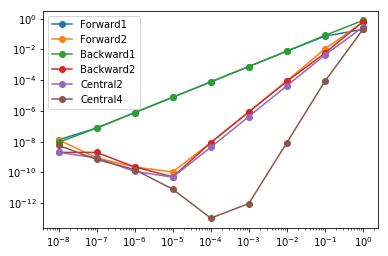

In [63]:
h_def = np.logspace(-8,0,9)
dff1,dff2 = df_Forward(1.0,f1,h_def)
dfb1,dfb2 = df_Backward(1.0,f1,h_def)
dfc2,dfc4 = df_Central(1.0,f1,h_def)
plt.loglog(h_def,np.abs(df1(1)-dff1),"-o")
plt.loglog(h_def,np.abs(df1(1)-dff2),"-o")
plt.loglog(h_def,np.abs(df1(1)-dfb1),"-o")
plt.loglog(h_def,np.abs(df1(1)-dfb2),"-o")
plt.loglog(h_def,np.abs(df1(1)-dfc2),"-o")
plt.loglog(h_def,np.abs(df1(1)-dfc4),"-o")
plt.legend(["Forward1","Forward2","Backward1","Backward2","Central2","Central4"])

#### Problem 4

In [71]:
plane = np.load('plane.npy')
t, alpha, beta = plane[:, 0], plane[:, 1], plane[:, 2]
alpha, beta = np.deg2rad(α), np.deg2rad(β)
x = 500 * np.tan(beta) / (np.tan(beta) - np.tan(alpha))
y = 500 * (np.tan(beta) * np.tan(alpha)) / (np.tan(beta) - np.tan(alpha))
x_p = np.zeros_like(t)
y_p = np.zeros_like(t)

# Forward
x_p[0] = x[1] - x[0]
y_p[0] = y[1] - y[0]

# Center
x_p[1:-1] = (x[2:] - x[:-2]) / 2
y_p[1:-1] = (y[2:] - y[:-2]) / 2

# Backward
x_p[-1] = x[-1] - x[-2]
y_p[-1] = y[-1] - y[-2]

In [73]:
speeds = np.sqrt(x_p**2 + y_p**2)
print(t, speeds)

[ 7.  8.  9. 10. 11. 12. 13. 14.] [23.81632859 24.13623281 26.01603085 27.49733799 27.23212459 30.5415957
 33.12955849 32.22147114]


#### Problem 5

In [65]:
def jacobian(f, x, h):
    n = len(x)
    m = len(f(x))
    jacobian = np.empty((n, m))
    for j in range(n):
        e = np.identity(n)[j]
        jacobian[:, j] = (f(x + h * e) - f(x - h * e)) / (2 * h)
    return jacobian

In [66]:
f = lambda X: np.array([X[0] ** 2, X[0] ** 3 - X[1]]).T
X = np.array([1, 2])
jacobian(f, X, 1e-3)

array([[ 2.      ,  0.      ],
       [ 3.000001, -1.      ]])

#### Problem 6

In [124]:
from autograd import elementwise_grad
from autograd import numpy as anp

def T(x, n):
    
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
        
    return 2 * x * T(x, n - 1) - T(x, n - 2)

### Iterative Solver
#### Problem 1

In [83]:
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt

In [84]:
def jacobi(A, b, tol=1e-8, maxiter=100, plot=False):
    
    error = 1e3
    it = 0
    
    D = np.diag(A)
    L = np.tril(A)
    U = np.triu(A)
    
    x = np.ones_like(b)  # Initial guess
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        x_new = x + (b - A @ x) / D
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new
        
    if it < maxiter:
        print(f'Converged in {it} iterations')
        
    if plot:
        plt.plot(range(1, it + 1), errors[:it])
        plt.semilogy()
        plt.xlim(1, it)
        plt.title('Covergence of Jacobi Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    return x

In [86]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

Converged in 15 iterations


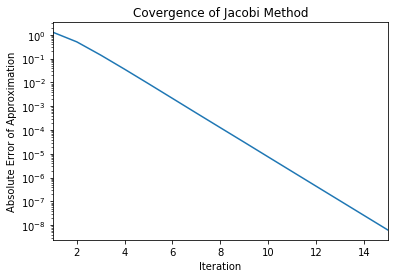

True

In [90]:
n = 5000
A = diag_dom(n)
b = np.random.random(n)
x_opt = jacobi(A, b, plot=True)
np.allclose(A @ x_opt, b, atol=1e-6)

#### Problem 3

In [88]:
def gauss_seidel(A, b, tol=1e-8, maxiter=100, plot=False):
    
    error = 1e3
    it = 0
    
    x = np.ones_like(b)  # Initial gues
    x_new = x.copy()
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        for i in range(len(x)):
            x_new[i] = x_new[i] + (1 / A[i, i]) * (b[i] - A[i, :].T @ x_new)  
        
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new.copy()
        
    if it < maxiter:
        print(f'Converged in {it} iterations')
        
    if plot:
        plt.plot(range(1, it + 1), errors[:it])
        plt.semilogy()
        plt.xlim(1, it)
        plt.title('Covergence of Gauss-Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    return x

Converged in 10 iterations


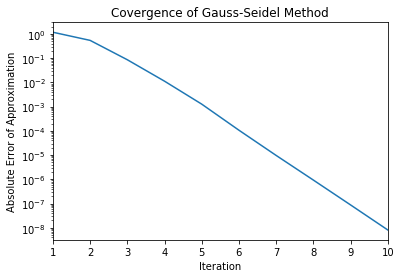

True

In [89]:
x_opt = gauss_seidel(A, b, plot=True)
np.allclose(A @ x_opt, b, atol=1e-6)

#### Problem 4

In [92]:
from scipy import sparse

def gauss_seidel_sparse(A, b, tol=1e-8, maxiter=100):
    
    error = 1e3
    it = 0
    
    x = np.ones_like(b)  # Initial guess
    x_new = x.copy()
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        for i in range(len(x)):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]

            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x_new[i] = x_new[i] + (1 / A[i, i]) * (b[i] - Aix)  
        
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new.copy()
        
    if it < maxiter:
        print(f'Converged in {it} iterations')
    else:
        print('Did not converge')
        
    return x

In [93]:
A_sparse = sparse.csr_matrix(diag_dom(500))
b_sparse = np.random.random(500)
x_opt = gauss_seidel_sparse(A_sparse, b_sparse)
np.allclose(A_sparse @ x_opt, b_sparse)

Converged in 16 iterations


True

#### Problem 5

In [94]:
def SOR(A, b, ω, tol=1e-8, maxiter=100, plot=False, print_flag=True):
    
    error = 1e3
    it = 0
    
    x = np.ones_like(b)  # Initial gues
    x_new = x.copy()
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        for i in range(len(x)):
            x_new[i] = x_new[i] + (ω / A[i, i]) * (b[i] - A[i, :].T @ x_new)  
        
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new.copy()
        
    if print_flag:
        if it < maxiter:
            print(f'Converged in {it} iterations')
        else:
            print('Did not converge')
        
    return x, it, it < maxiter

In [95]:
SOR(A, b, 1.3)

Converged in 24 iterations


(array([0.00810987, 0.00758381, 0.00338969, ..., 0.00395336, 0.0030267 ,
        0.00688595]), 24, True)

#### Problem 6

In [105]:
def SOR_la(n, ω, tol=1e-8, maxiter=100, plot=False, print_flag=True):
    
    A = -4 * np.eye(n**2) + np.eye(n**2, k=1) + np.eye(n**2, k=-1) + np.eye(n**2, k=-n) + np.eye(n**2, k=n)
    b = np.zeros(n)
    b[0] = -100
    b[-1] = -100
    b = np.tile(b, n)
    
    u, iterations, converged = SOR(A, b, ω, tol, maxiter, False, print_flag)
    u = u.reshape(n, n)

    if plot:
        plt.pcolormesh(u, cmap='coolwarm')
        a = plt.show()
        
    return a

Converged in 451 iterations


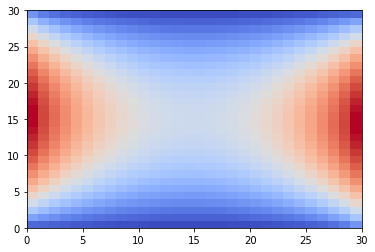

In [106]:
SOR_la(30, 1.8, maxiter=500, plot=True)

#### Problem 7

In [110]:
ω_s = np.linspace(1, 1.95, 20)
n_iterations = np.nan * np.ones_like(ω_s)
n = 20

def SOR_la2(n, ω, tol=1e-8, maxiter=100, plot=False, print_flag=True):
    
    A = -4 * np.eye(n**2) + np.eye(n**2, k=1) + np.eye(n**2, k=-1) + np.eye(n**2, k=-n) + np.eye(n**2, k=n)
    b = np.zeros(n)
    b[0] = -100
    b[-1] = -100
    b = np.tile(b, n)
    
    u, iterations, converged = SOR(A, b, ω, tol, maxiter, False, print_flag)
    u = u.reshape(n, n
        
    return u,iterations, converged

for i, ω in enumerate(ω_s):
    result = SOR_la2(n, ω, tol=1e-2, maxiter=1000, print_flag=False)
    if result[2]:
        n_iterations[i] = result[1]

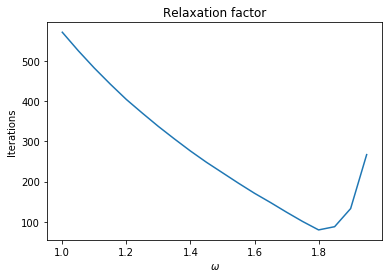

array([1.8])

In [118]:
plt.plot(ω_s, n_iterations)
plt.xlabel('$\omega$')
plt.ylabel('Iterations')
plt.title('Relaxation factor')
plt.show()
ω_s[[n_iterations.argmin()]]